# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW5. Treap/Heap, Union-find

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [4]:
import matplotlib.pyplot as plt

In [5]:
def ex2():
    plt.subplots(figsize=(10, 10))

    plt.scatter(1, 3, color="black", marker="o", s=100, zorder=2)
    plt.annotate("non-overlapping", (0.2, 3.6), size=12)
    plt.annotate("(1, 3)", (1.4, 2.9), size=12)

    plt.scatter(15, 17, color="black", marker="o", s=100, zorder=2)
    plt.annotate("non-overlapping", (12.2, 17.4), size=12)
    plt.annotate("(15, 17)", (13.2, 16.4), size=12)

    plt.scatter(6, 8, color="black", marker="o", s=100, zorder=2)
    plt.annotate("fully embedded", (5.2, 8.6), size=12)
    plt.annotate("(6, 8)", (6.4, 7.8), size=12)

    plt.scatter(3, 7, color="black", marker="o", s=100, zorder=2)
    plt.annotate("partially overlapping", (0.2, 7.4), size=12)
    plt.annotate("(3, 7)", (3.4, 6.8), size=12)

    plt.scatter(8, 15, color="black", marker="o", s=100, zorder=2)
    plt.annotate("partially overlapping", (5.2, 15.4), size=12)
    plt.annotate("(8, 15)", (8.4, 14.8), size=12)

    plt.scatter(2, 18, color="black", marker="o", s=100, zorder=2)
    plt.annotate("covers interval fully", (0.2, 18.4), size=12)
    plt.annotate("(2, 18)", (2.4, 17.7), size=12)

    plt.scatter(5, 10, color="tab:blue", marker="s", s=300, label="reference interval (5, 10)", zorder=2)
    plt.annotate("(5, 10)", (5.4, 10.4), size=15, color="white")

    plt.gca().add_patch(plt.Polygon([[0, 10], [0, 20], [5, 20], [5, 10]], color="tab:red", label="covers interval fully"))
    plt.gca().add_patch(plt.Polygon([[0, 5], [0, 10], [5, 10], [5, 5]], color="tab:orange"))
    plt.gca().add_patch(plt.Polygon([[5, 10], [5, 20], [10, 20], [10, 10]], color="tab:orange", label="partially overlapping "))
    plt.gca().add_patch(plt.Polygon([[5, 5], [5, 10], [10, 10]], color="yellow", label="fully embedded"))
    plt.gca().add_patch(plt.Polygon([[0,0], [0, 5], [5, 5]], color="limegreen"))
    plt.gca().add_patch(plt.Polygon([[10,10], [10, 20], [20, 20]], color="limegreen", label="non-overlapping"))

    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.grid()
    plt.legend(prop={'size': 18})
    plt.title('Interval Overlap', fontsize=20)
    plt.xlabel('x (start)', fontsize=16)
    plt.ylabel('y (end)', fontsize=16)
    plt.show()

# EX1

##### Read: Kamp (CACM 2010 53:7) "You're doing it all wrong.".
##### What is the main criticism in the article?
Main criticism what that a blind application of generally fast and tested algorithm can result in suboptimal performance if it isn't optimized for its use case. And that is something that should more thoroughly taught in schools.
##### What is your opinion about the article?
The article made a valid point that being knowledgeable about underlying architecture and resource usage of your system and virtual machines allows one to come up with this kind of performance improvements. He manipulated storing the data such that it would match the memory architecture.

##### Discuss how exactly the Heap's use of implicit indexing (i => 2*i, 2*i+1; and parent==i/2 ) should be changed according to Kamp's article.

The new heap can be viewed as a heap that stores page numbers, every node has 4 children and each node has 8 internal nodes.
Top node is at index 0 and children can be accessed with $i => 4*i+1$, $4*i+2$, $4*i+3$, $4*i+4$ and parent $(i-1)/4$.
The access varies for internal nodes based on position.

And to search for value at index i, I know that it must be in page number $\lfloor i / 8 \rfloor$. Example: searching for index 40 looks for index 5 in the original heap, then accesses its internal nodes. Internal node has values from $\lfloor i / 8 \rfloor$ to $\lfloor i / 8 \rfloor + 7$.

# EX2

##### Consider an interval (x, y). In this exercise, we will interpret these intervals as geometrical points in 2D space, such that x would be on the x-axis and y on the y-axis (interval (1,2) would be represented as a point p = (1,2) on 2D plot).

##### First of all, we will fix one interval (5, 10) and use it as a reference interval. The rest of the points in this 2D space need to be coloured according to the type of relationship they have with the reference interval. For example interval (1, 3) would be non-overlapping from the left to the reference interval, interval (11, 14) non-overlapping from the right etc. How many types of relationships are there in this 2D space? Visualise these types by colouring points (making coloured regions) in the space accordingly. Include a reference interval and also one example interval from each region.

In interval (x, y) I considered x as start and y as end, so areas where y < x aren't included.

Reference interval: (5, 10)

Example interval from each region:

Non-overlapping (red):
* (1, 3) - begins before and finishes before reference interval
* (15, 17) - begins after reference interval

Fully embedded (dark green):
*  (6, 8) - both start and end overlap reference interval

Partially overlapping:
*  (3, 7) - starts before but end overlaps reference interval
*  (8, 15) - start overlaps but finishes after reference interval

Covers interval fully:
* (2, 18) - starts before and ends after reference interval

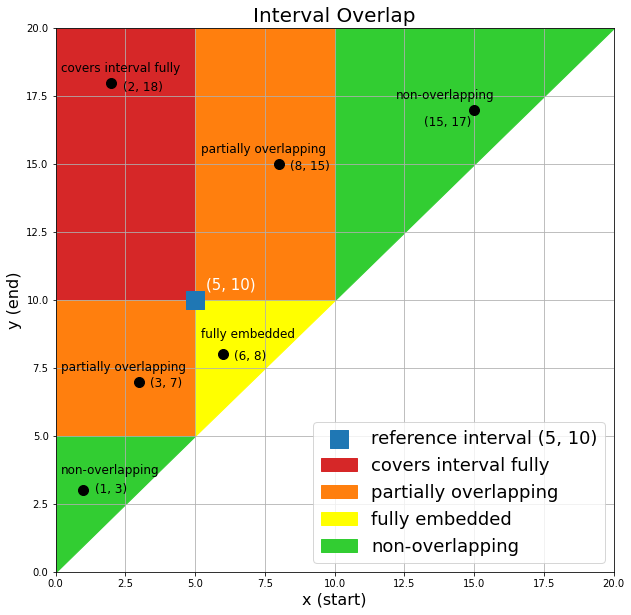

In [6]:
ex2()

# EX3

##### Treap is an augmented binary search tree. Practically it has properties of a BST + heap. Every node is associated with a value, which has the constraint that larger values are higher up in the tree than children nodes (for max heap). Those keys are often randomly generated.

##### Every time you insert an element, you generate an additional heap value (priority value) for it and insert it like you would insert to a BST, which is followed by rotations (single rotations) to fix the heap property (just rotate it up the tree) until the tree is fixed. In order to delete a key, you first change the heap's value to -infinite and rotate it down the tree.

##### Insert the following keys in order (left-to-right) to a Treap. For BST, the keys are in lexicographical order (A < B, B < C, etc..):
#####  A, B, C, D, E, F, G, H, I

##### 1) Every time you insert one, generate a random number for the heap priority values. For at least one insertion, show how you perform the rotations.

##### 2) Now insert the keys again (to a new tree), but this time, take every heap priority value to be equal to 1. What happened?
2) Priorities are equal, so the treap becomes just a regular binary search tree and inserting an ordered list results in the same ordered list.

##### 3) Play around with distribution of priority keys, such that the tree becomes more balanced when inserting nodes in the same order (A to I). (Don't worry if you don't get a perfectly balanced tree)


## 1)
![treap 1](https://i.imgur.com/94igDuS.png)
![treap 1 - rotations](https://i.imgur.com/NzNPTlD.png)
## 2)
![treap 2](https://i.imgur.com/mnPQnSF.png)
## 3)
![treap 3](https://i.imgur.com/8vjeniN.png)

# EX4

##### Your task is to use Union-Find with and without path compression on the following nodes (consider each to be a single-element set already).

#####  1, 2, 3, 4, 5, 6, 7, 8

##### Briefly describe the algorithm. How do you decide which node becomes the parent when applying union? How does path compression work?

MAKE-SET is already called on all elements, so every node points to itself.

For UNION(x, y) operation, FIND-SET gets called on both x and y which returns pointers to their root nodes. A UNION(x, y) operation causes the root of x tree to point to the root of y tree.

With path compression, FIND-SET operations makes every node in the path from query node to the root point directly to the root.

##### First, apply union operation in the following order:

##### Union(1,2), Union(3,4), Union(5,6), Union(6,7), Union(3,7), Union(4,8), Union(1,6)

##### What is the height of this tree? Now demonstrate finding 3 (when using path compression, how does the tree change? If you find 3 again, then how many comparisons less do you have to do?). How can you use this data structure to figure out that two nodes belong to the same set?

Height of both trees is 3. Finding 3 with path compression does 4 comparisons the first time, and 2 comparisons finding it the second time.
I can figure out if two nodes belong to the same set if using calling FIND-SET on both nodes returns the same root node.

##### Show the final result both in array-structure and in a tree-structure

# <font color="blue"> UNION(x, y) chooses y as new root </font>

![without path compression](https://i.imgur.com/D5xOfDR.png)
![with path compression](https://i.imgur.com/1ulgtoT.png)
![find 3 with path compression](https://i.imgur.com/NId49dn.png)

# <font color="blue"> UNION(x, y) chooses x as new root </font>

![without path compression](https://i.imgur.com/vS4xSqp.png)
![with path compression](https://i.imgur.com/DHloQb3.png)

# EX5

##### Use 4-D data points given below. Define a random hyperplane direction (hint: random 4-D unit vector). Find such a hyperplane that would split the data points at “median” - half on one side, half on another side. Label the below points accordingly and calculate the distance from the hyperplane. Provide formulae in your report.

##### Hint1: Feel free to take any vector in this case, just make sure it is a unit vector (it makes it simpler). You can turn a vector into a unit vector by dividing it by its magnitude (google: vector magnitude/length, unit vector). (If you really want to sample a uniformly random vector, then you should actually sample each coordinate from Normal distribution N(0,1), and then normalize the vector to length 1.)

##### Hint2: In order to find a splitting hyperplane, you should first project your data onto that unit vector. Consider each datapoint to be a vector on its own, so you project vectors on a vector. Now, the question is, how do you find the median projection (hint: think of scalar projections and find the median value?)?

##### Hint3:  Next task is to use this found median point and initial random vector to define the dividing hyperplane. Hyperplane can be defined using its normal vector and a point on the hyperplane (google :), ps hyperplane will be 1 dimension less than your initial data). As the point, you can use the median point which you found previously. What could the normal vector be?

# <font size="20" color="red">TODO</font>

In [7]:
data = [[73.64, 10.36, 97.37, 53.8],
 [34.17, 94.43, 33.35, 73.01],
 [32.08, 97.13, 25.58, 43.36],
 [51.45, 89.81, 38.43, 48.67],
 [15.24, 95.85, 97.98, 81.92],
 [44.86, 12.32, 29.15, 81.43],
 [34.5, 28.76, 48.76, 66.48],
 [67.45, 22.75, 53.81, 40.16],
 [7.51, 90.28, 81.9, 45.47],
 [77.12, 26.87, 22.04, 81.32],
 [71.35, 66.32, 86.06, 35.05],
 [23.59, 38.7, 26.6, 47.57],
 [17.07, 44.94, 41.63, 72.22],
 [12.07, 61.15, 20.94, 37.69],
 [48.47, 37.5, 25.41, 82.65],
 [92.62, 66.0, 54.0, 65.94],
 [79.05, 60.91, 1.42, 39.06],
 [1.54, 83.79, 92.31, 63.5],
 [20.09, 65.39, 75.14, 69.09]]

# EX6

##### Oct-tree is a generalisation of quad-tree from 2D into 3D. Now generalise it further into 4D and show how the data from the previous exercise would be distributed. Note that to identify a particular (largest bounding) cell a binary vector - 0/1 along each dimension is sufficient. Assign to each point the label of a bounding box with such 4-bit numbering. If a cell has more than one value, split it further. For the first data point, the outermost bounding box is 1101 and for the second point, it is 0010. If some cell contains multiple values and needs to be split further, indicate that particular next-level split as well. How would you search for a new query point listing all points within a radius 10 from it?

# <font size="20" color="red">TODO</font>

# EX7

##### Range searching in high-dimensional points (k - d points) find its use in computational geometry. For example, 5 attributes of a structured data can be age, gender, yearly income, years of work experience, and number of diplomas, viewed as a 5-D point (34, 1, 40000, 10, 2).

- ##### Show (or prove) how to efficiently implement a tree-based data structure to perform range searches over this data, e.g., for a query like: What are the individuals that are older than 30 and earn between 23k and 50k with more than 10 years of experience?

- ##### Can you come up with your own real-world idea of use case for a similar situation, applied to a collection of structured elements? You can create your own high-dimensional (maximum 10 dimension) synthetic data (using some distribution of your choice). Try to adapt your variation of these trees to efficiently answer a range of search queries. Give some examples and try to measure the performance (variance etc).
# <font size="20" color="red">TODO</font>